### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.14.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
trainX.shape

(60000, 28, 28)

In [6]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY)

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


In [0]:
testY = tf.keras.utils.to_categorical(testY)

In [10]:
print(testY.shape)
print('First 5 examples now are: ', testY[0:5])

(10000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import matplotlib.pyplot as plt

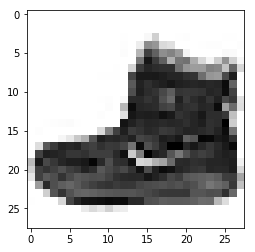

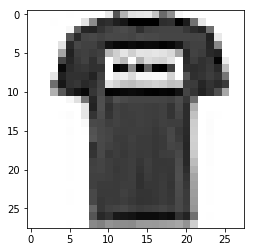

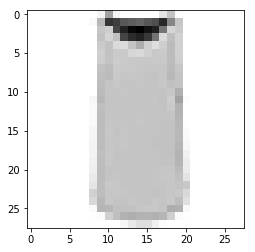

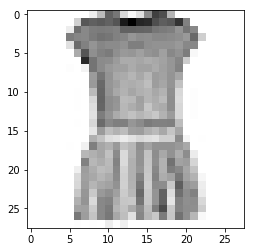

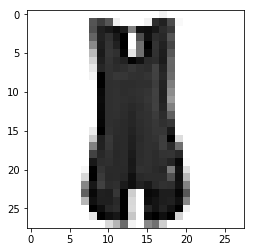

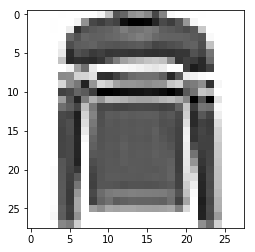

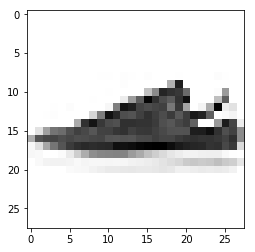

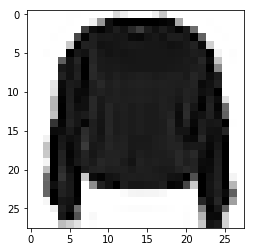

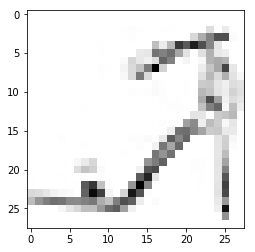

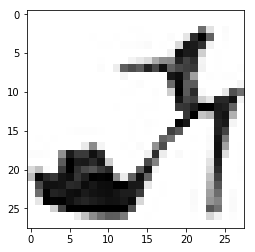

In [12]:
for i in range(0,10):
  plt.imshow(trainX[i], cmap='Greys')
  plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [13]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

W0929 05:18:56.247464 139937936250752 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Execute the model using model.fit()

In [14]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 107us/sample - loss: 2090.7693 - acc: 0.7407 - val_loss: 1573.7273 - val_acc: 0.7904
Epoch 2/100
60000/60000 [==============================] - 6s 97us/sample - loss: 1630.7235 - acc: 0.7782 - val_loss: 2817.6766 - val_acc: 0.6670
Epoch 3/100
60000/60000 [==============================] - 6s 96us/sample - loss: 1563.9093 - acc: 0.7843 - val_loss: 1603.4943 - val_acc: 0.7958
Epoch 4/100
60000/60000 [==============================] - 6s 94us/sample - loss: 1483.6755 - acc: 0.7904 - val_loss: 2085.5669 - val_acc: 0.7576
Epoch 5/100
60000/60000 [==============================] - 6s 94us/sample - loss: 1502.0720 - acc: 0.7928 - val_loss: 1157.8106 - val_acc: 0.8080
Epoch 6/100
60000/60000 [==============================] - 6s 98us/sample - loss: 1481.5293 - acc: 0.7955 - val_loss: 1831.5234 - val_acc: 0.7779
Epoch 7/100
60000/60000 [==============================] - 6s 102us/sampl

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization(input_shape=(4,)))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [16]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=300, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 7s 111us/sample - loss: 0.5922 - acc: 0.7980 - val_loss: 0.5178 - val_acc: 0.8265
Epoch 2/300
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4898 - acc: 0.8310 - val_loss: 0.4970 - val_acc: 0.8321
Epoch 3/300
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4660 - acc: 0.8389 - val_loss: 0.4821 - val_acc: 0.8374
Epoch 4/300
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4564 - acc: 0.8423 - val_loss: 0.4825 - val_acc: 0.8366
Epoch 5/300
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4486 - acc: 0.8443 - val_loss: 0.4784 - val_acc: 0.8363
Epoch 6/300
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4426 - acc: 0.8467 - val_loss: 0.4692 - val_acc: 0.8393
Epoch 7/300
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4371 - acc: 0.8486 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization(input_shape=(4,)))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))


sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd_optimizer)

In [18]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=300, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 7s 115us/sample - loss: 0.9425 - acc: 0.6785 - val_loss: 0.6967 - val_acc: 0.7647
Epoch 2/300
60000/60000 [==============================] - 7s 112us/sample - loss: 0.6492 - acc: 0.7787 - val_loss: 0.6214 - val_acc: 0.7907
Epoch 3/300
60000/60000 [==============================] - 7s 110us/sample - loss: 0.5929 - acc: 0.7966 - val_loss: 0.5859 - val_acc: 0.8020
Epoch 4/300
60000/60000 [==============================] - 7s 111us/sample - loss: 0.5617 - acc: 0.8063 - val_loss: 0.5604 - val_acc: 0.8091
Epoch 5/300
60000/60000 [==============================] - 7s 113us/sample - loss: 0.5416 - acc: 0.8141 - val_loss: 0.5470 - val_acc: 0.8122
Epoch 6/300
60000/60000 [==============================] - 7s 115us/sample - loss: 0.5280 - acc: 0.8195 - val_loss: 0.5363 - val_acc: 0.8153
Epoch 7/300
60000/60000 [==============================] - 7s 118us/sample - loss: 0.5193 - acc: 0.8218 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization(input_shape=(4,)))

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))


sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd_optimizer)

In [20]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=300, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 8s 126us/sample - loss: 1.5780 - acc: 0.6122 - val_loss: 1.0541 - val_acc: 0.7262
Epoch 2/300
60000/60000 [==============================] - 7s 123us/sample - loss: 0.8712 - acc: 0.7422 - val_loss: 0.7261 - val_acc: 0.7598
Epoch 3/300
60000/60000 [==============================] - 7s 123us/sample - loss: 0.6783 - acc: 0.7698 - val_loss: 0.6204 - val_acc: 0.7817
Epoch 4/300
60000/60000 [==============================] - 7s 122us/sample - loss: 0.5995 - acc: 0.7906 - val_loss: 0.5627 - val_acc: 0.7984
Epoch 5/300
60000/60000 [==============================] - 8s 129us/sample - loss: 0.5505 - acc: 0.8055 - val_loss: 0.5274 - val_acc: 0.8114
Epoch 6/300
60000/60000 [==============================] - 8s 126us/sample - loss: 0.5178 - acc: 0.8172 - val_loss: 0.5028 - val_acc: 0.8170
Epoch 7/300
60000/60000 [==============================] - 7s 123us/sample - loss: 0.4965 - acc: 0.8252 

## Review model

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

*Model has been run in the above steps.*